In [1]:
# 데이터 분석 패키지
import numpy as np
import pandas as pd

In [2]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 50)  # None으로 설정하면 모든 행 출력

In [3]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# matplotlib 한글지원 패키지
import koreanize_matplotlib

#### 개별종목 시세 가져오기

In [5]:
import FinanceDataReader as fdr

In [6]:
# 종목정보파일 데이터 프레임으로 가져오기
df_stocks = pd.read_csv('stocks.csv')

In [7]:
df_stocks.shape

(2855, 23)

#### 종목명으로 종목코드 받아오는 함수 만들기

In [8]:
df_stocks.columns

Index(['Code', 'Name', 'Market', 'Dept', 'Close', 'ChangeCode', 'Changes',
       'ChagesRatio', 'Open', 'High', 'Low', 'Volume', 'Amount', 'Marcap',
       'Stocks', 'MarketId', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [9]:
# 종목명으로 코드조회
def find_codes_by_name(name) :
    try :
        return df_stocks[df_stocks['Name'].str.contains(name)][['Code','Name']]
    except IndexError as e:    
        return -1
    

In [10]:
# 종목명으로 코드조회
def find_code_by_name(name) :
    try :
        return df_stocks[df_stocks['Name'] == name]['Code'].values[0]
    except IndexError as e:    
        return -1

In [11]:
find_codes_by_name('카카오')

,Code,Name
17,035720,카카오
41,323410,카카오뱅크
82,377300,카카오페이
180,293490,카카오게임즈


In [20]:
# 종목명으로 일별 시세 받아오는 함수
def get_daily_price(name,start=None,end=None):
    return fdr.DataReader(find_code_by_name(name),start,end)

In [21]:
# 삼성전자 일별 시세 받아오기
# df_stock = fdr.DataReader('005930')
df_samsung = get_daily_price('삼성전자','2024-01-01')

In [22]:
df_samsung.shape

(231, 6)

In [23]:
df_samsung.head(3)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-01-02,78200,79800,78200,79600,17142847,0.014013
2024-01-03,78500,78800,77000,77000,21753644,-0.032663
2024-01-04,76100,77300,76100,76600,15324439,-0.005195


In [24]:
df_samsung.tail(3)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-12-06,53900,54400,52700,54100,22861874,0.007449
2024-12-09,53500,54600,53200,53400,26227680,-0.012939
2024-12-10,54500,54500,53700,53700,12218529,0.005618


<Axes: xlabel='Date'>

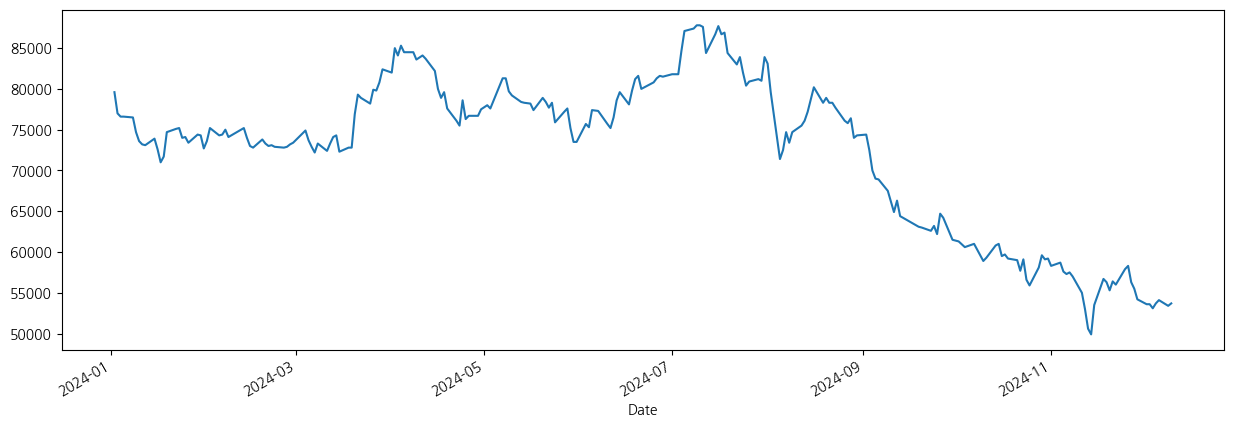

In [32]:
df_samsung['Close'].plot(kind='line',figsize=(15,5))

<Axes: xlabel='Date'>

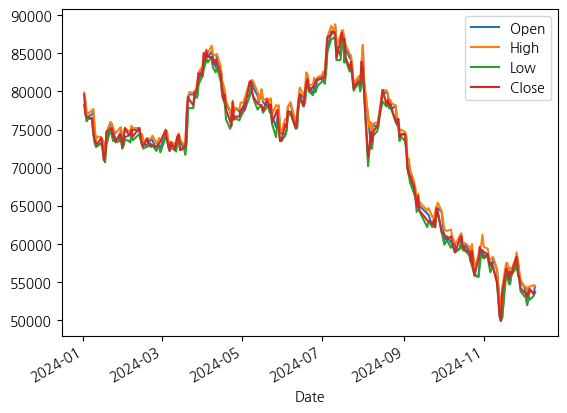

In [34]:
df_samsung[['Open','High','Low','Close']].plot(kind='line')

<Axes: xlabel='Date'>

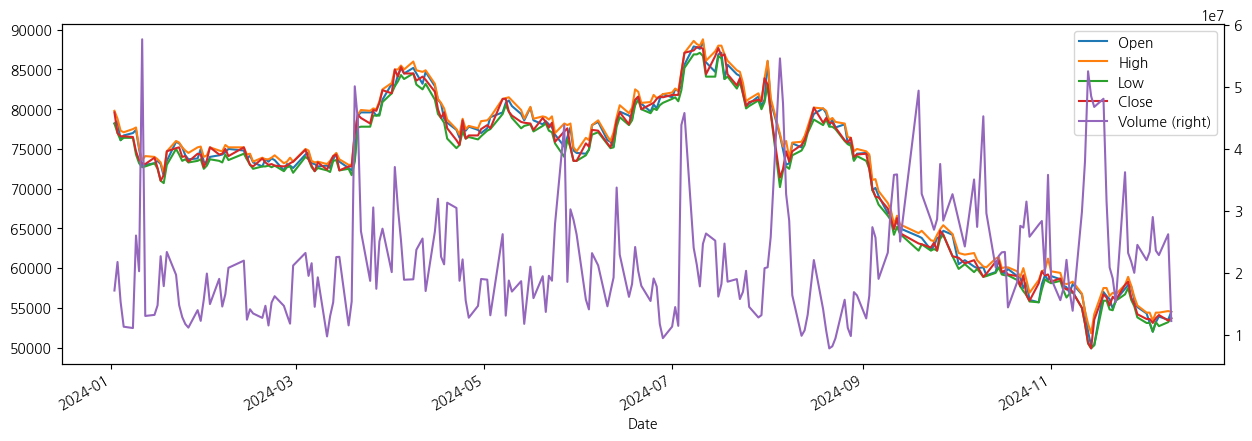

In [38]:
# 2축그래프
df_samsung[['Open','High','Low','Close','Volume']].plot(kind='line',secondary_y='Volume',figsize=(15,5))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

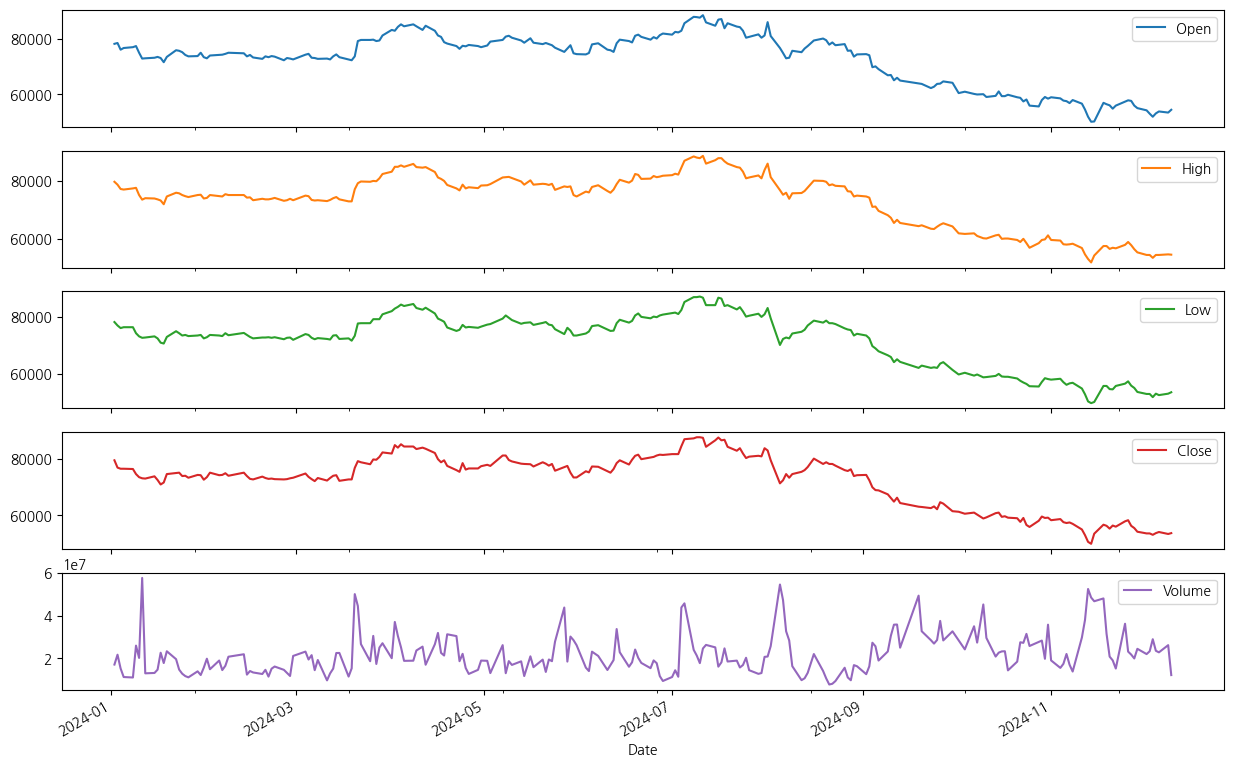

In [41]:
df_samsung[['Open','High','Low','Close','Volume']].plot(kind='line',subplots=True,figsize=(15,10))

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

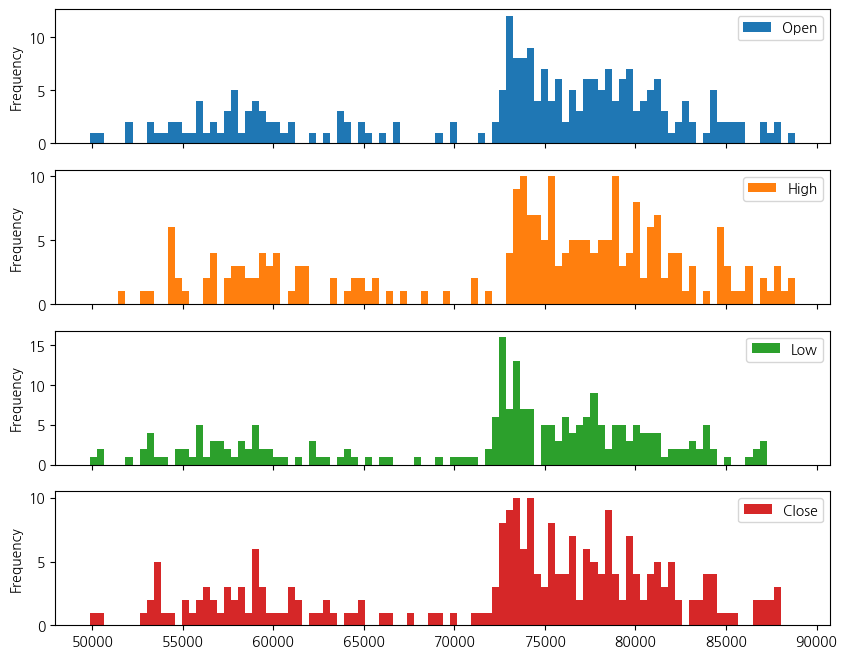

In [44]:
df_samsung[['Open','High','Low','Close']].plot(kind='hist',subplots=True, figsize=(10,8), bins=100)